###Statistical Data Analysis Problem sheet 2

1. Produce a scatterplot of the data.

Lets import the text file and create the dataframe.

In [18]:
#importing all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/content/drive/MyDrive/1-DS/wine.txt', sep=" ")
df.head()

,Year,Wine,Cluster
0,1971,5.6,116.37
1,1973,3.2,82.77
2,1974,4.5,110.68
3,1975,4.2,97.50
4,1976,5.2,115.88


In [2]:
df["Wine"]

0     5.6
1     3.2
2     4.5
3     4.2
4     5.2
5     2.7
6     4.8
7     4.9
8     4.7
9     4.1
10    4.4
11    5.4
Name: Wine, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


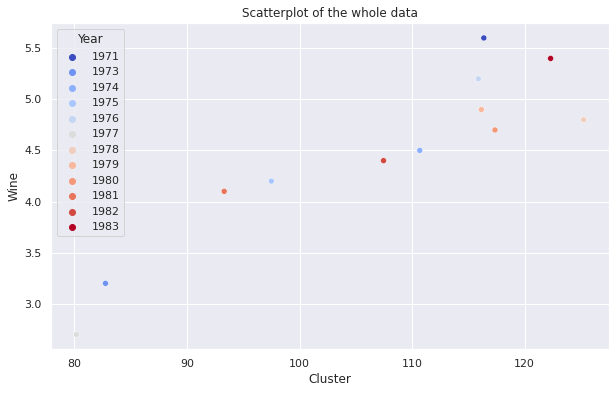

In [9]:
#setting style
sns.color_palette("Set2")
sns.set_style("whitegrid")
#define figure size
sns.set(rc={"figure.figsize":(10, 6)}) #width=8, height=4
#ploting scatterplot
sns.scatterplot(df["Cluster"],df["Wine"], df["Year"], legend="full", palette="coolwarm")
plt.title("Scatterplot of the whole data")

plt.show()

2. Assume the a simple linear regression model and estimate the parameters β0 and
β1 in the regression model (use your own derivation).


In [16]:
#defining x and y for the regression model
x = df["Cluster"]
y = df["Wine"]

N = len(x)
#deriving a regression function
def lin_reg(x,y):
  x_mean=x.mean()
  y_mean=y.mean()
  x_var = x - x_mean
  y_var = y - y_mean
  #sum of products of x and y variance
  sumof_xy_var = (x_var * y_var).sum()
  
  sumof_sig_x = ((x_var)**2).sum()
  #now we can estimate b1
  b1 = sumof_xy_var/sumof_sig_x
  #estimating b0
  b0 = y_mean - (b1*x_mean)
  #printing the line as y = mx + b = b1(x) + b0
  simple_reg_lin = 'y = {}β + {}'.format(round(b1, 4),round(b0, 4))

  return(b0, b1, simple_reg_lin)


In [17]:
#plugging in the data into the model
lin_reg(x,y)

(-1.027902709556801, 0.051380577893637314, 'y = 0.0514β + -1.0279')

3. Plot the regression line

To find the regression line we need 

* Correlation Coefficient (R) 
* Coefficient of Determination (R²)

We will be using pearson's correlation coefficient here to get the R and then simply square it to get the coefficient of determination which will tell us the goodness of fit.


In [20]:
#Pearson's correlation coefficient
def Pear_cor_coef(x,y):
  #sum of the products of x and y
  sumof_xy = (x * y).sum()
  x_sum = x.sum()
  y_sum = y.sum()
  #product of summation of x and y
  prod_sum = x_sum*y_sum
  #getting the summation of x and y square
  sumof_x_sq = (x**2).sum()
  sumof_y_sq = (y**2).sum()
  #now estimating R
  r = ((N*sumof_xy)-((x_sum * y_sum))) / (np.sqrt(((N * sumof_x_sq)-(x_sum**2))*((N * sumof_y_sq)-(y_sum**2))))
  return r

R = Pear_cor_coef(x,y)
#now estimating coefficient of determination
coef_det = R**2


In [21]:
#printing the correaltion coefficient and coefficient of determination
print('Correlation Coefficient: ', R)
print('Coefficient of Determination: ', coef_det)

Correlation Coefficient:  0.913214127416157
Coefficient of Determination:  0.8339600425124531


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


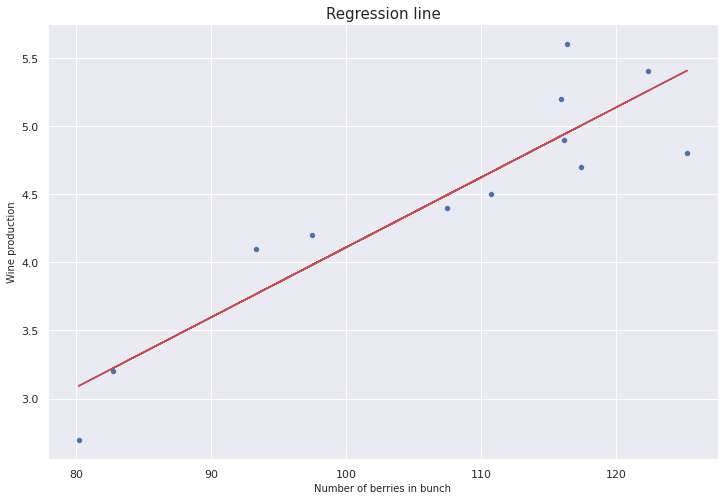

In [33]:
#now plotting the regression line
plt.figure(figsize=(12,8))
sns.scatterplot(x, y, palette="inferno")
plt.title('Regression line', fontsize=15)
plt.xlabel('Number of berries in bunch', fontsize=10)
plt.ylabel('Wine production', fontsize=10)
b0, b1, regline = lin_reg(x,y)
plt.plot(x, b0 + b1*x, c='r')

4. Predict the yearly production of wine if the number of berries in a bunch of grapes
is 100.

In [40]:
#predicting the value of wine production when the number of berries in a bunch of grapes is 100
newy = b0 + (b1*100)
print("Predicted Wine Production : ", round(newy, 2))

Predicted Wine Production :  4.11


### So The Predicted yearly wine production is 4.11 tons per 100 meter square if the number of berries in a bunch of grapes is 100.